# Segmentation of White Blood Cells 

In [1]:
import cv2
import imageio
import numpy as np
import matplotlib as mpl
from skimage import feature
import matplotlib.pyplot as plt

## 1. Loading Example images to work with

Loading Images from the folder: "CBC/Testing/Images", and use it as examples for this proposed method.

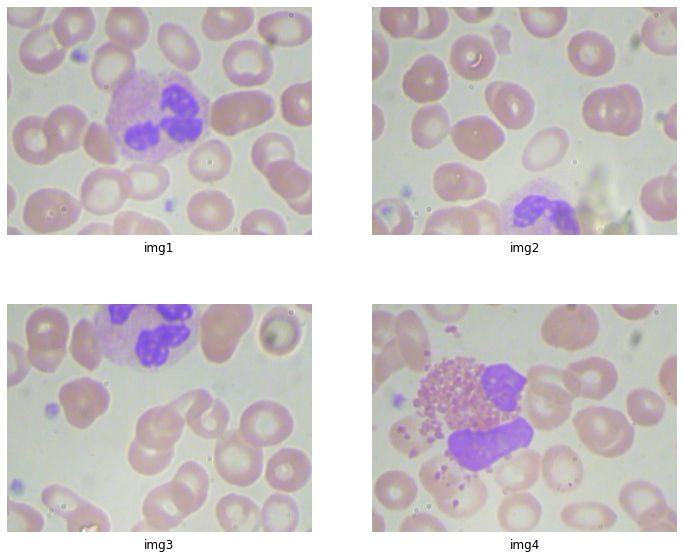

In [2]:
img1 = imageio.imread('../CBC/Testing/Images/BloodImage_00339.jpg')
img2 = imageio.imread('../CBC/Testing/Images/BloodImage_00340.jpg')
img3 = imageio.imread('../CBC/Testing/Images/BloodImage_00343.jpg')
img4 = imageio.imread('../CBC/Testing/Images/BloodImage_00344.jpg')

imgs = [img1, img2, img3, img4]
names = ['img1', 'img2', 'img3', 'img4']

plt.figure(figsize=(12,10))
for i, img in enumerate(imgs):
    plt.subplot(2,2,i+1)
    plt.axis('off')
    plt.title(names[i], y=-0.10)
    plt.imshow(img)

## 2. Convert the color space from RGB to HSV

Convert the images from the RGB space to the HSV space (Hue, Saturation and Value).

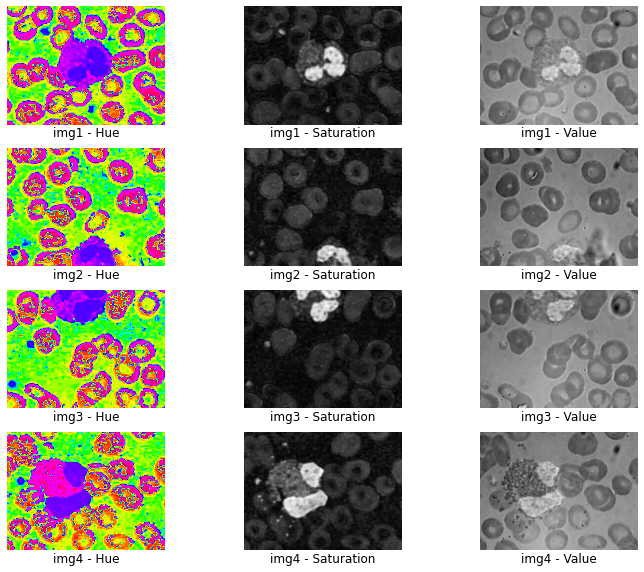

In [3]:
imgs_hsv = [mpl.colors.rgb_to_hsv(img) for img in imgs]
hsv_str = ['Hue', 'Saturation', 'Value']

plt.figure(figsize=(12,10))
cont = 1
for i, img in enumerate(imgs):
    for j in range(3):
        plt.subplot(4,3,cont)
        cont += 1
        plt.axis('off')
        plt.title(names[i] + ' - ' + hsv_str[j], y=-0.15)
        plt.imshow(imgs_hsv[i][:,:,j], cmap="hsv" if j == 0 else "gray")


## 3. Extract the Saturation Channel

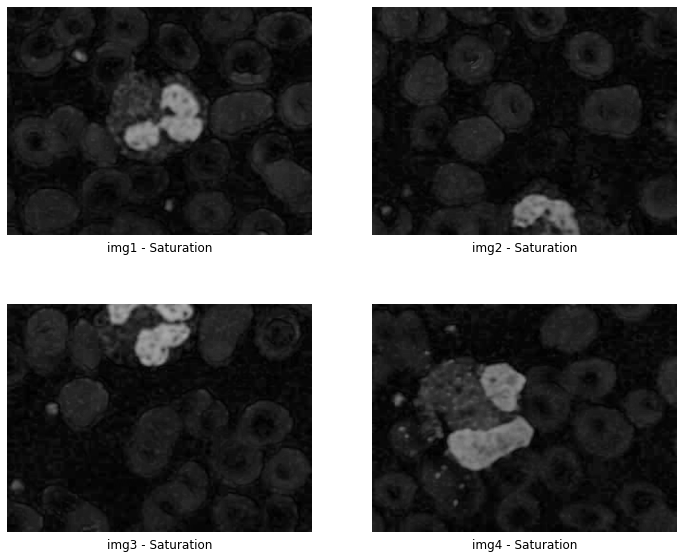

In [4]:
imgs_s = [img[:,:,1] for img in imgs_hsv]

plt.figure(figsize=(12,10))
for i, img in enumerate(imgs_s):
    plt.subplot(2,2,i+1)
    plt.axis('off')
    plt.title(names[i] + ' - ' + 'Saturation', y=-0.10)
    plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 1)

## 4. Normalization

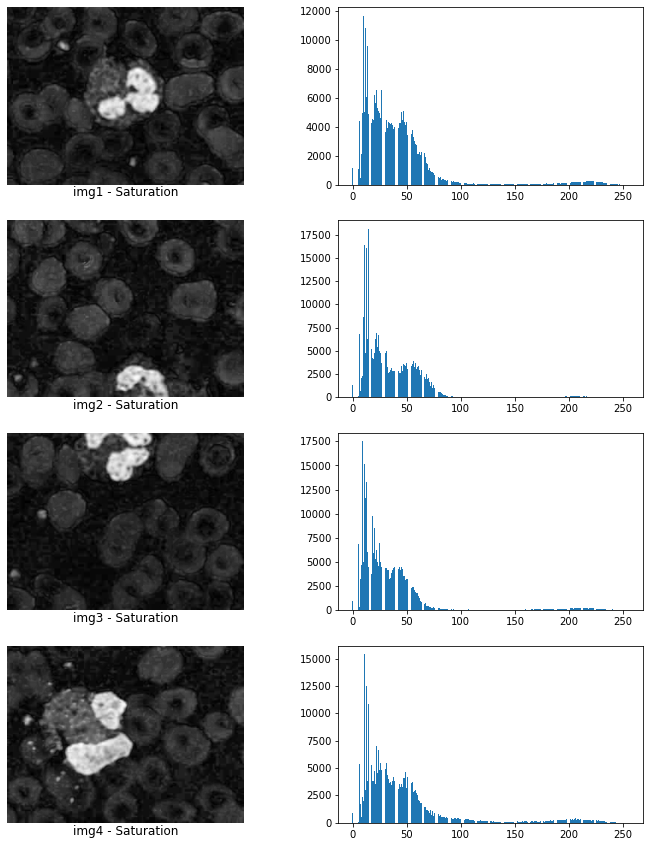

In [5]:
imgs_n = [cv2.normalize(img, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F) for img in imgs_s]
hists  = [np.histogram(img, bins=256, range=(0,256))[0] for img in imgs_n]

plt.figure(figsize=(12,15))
cont = 1
for i, img in enumerate(imgs_n):
    plt.subplot(4,2,cont)
    plt.axis('off')
    plt.title(names[i] + ' - ' + 'Saturation', y=-0.10)
    plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
    
    plt.subplot(4,2,cont + 1)
    plt.bar(np.arange(0,256), hists[i])
    cont += 2

## 5. Highlight White Blood cells using threshold

Aplication of a threshold of 150 to highlight the White Blood Cells from the other cells and background

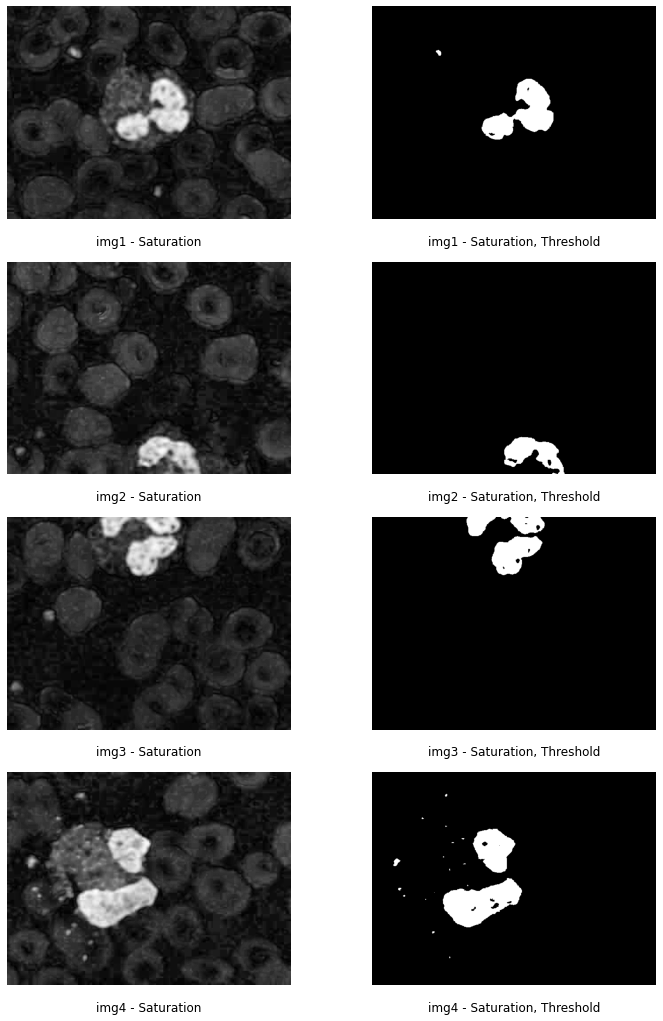

In [6]:
imgs_thrs = []

thrs = 150
plt.figure(figsize=(12,18))
cont = 1
for i, img in enumerate(imgs_n):
    img_thrs = img.copy()
    img_thrs[img <= thrs] = 0
    img_thrs[img > thrs] = 255
    imgs_thrs.append(img_thrs)
    
    plt.subplot(4,2,cont)
    plt.axis('off')
    plt.title(names[i] + ' - ' + 'Saturation', y=-0.15)
    plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
    
    plt.subplot(4,2,cont + 1)
    plt.axis('off')
    plt.title(names[i] + ' - ' + 'Saturation, Threshold', y=-0.15)
    plt.imshow(img_thrs, cmap = 'gray', vmin = 0, vmax = 255)
    cont += 2


## 6. Fill the Cells using Mathematiccal Morphology

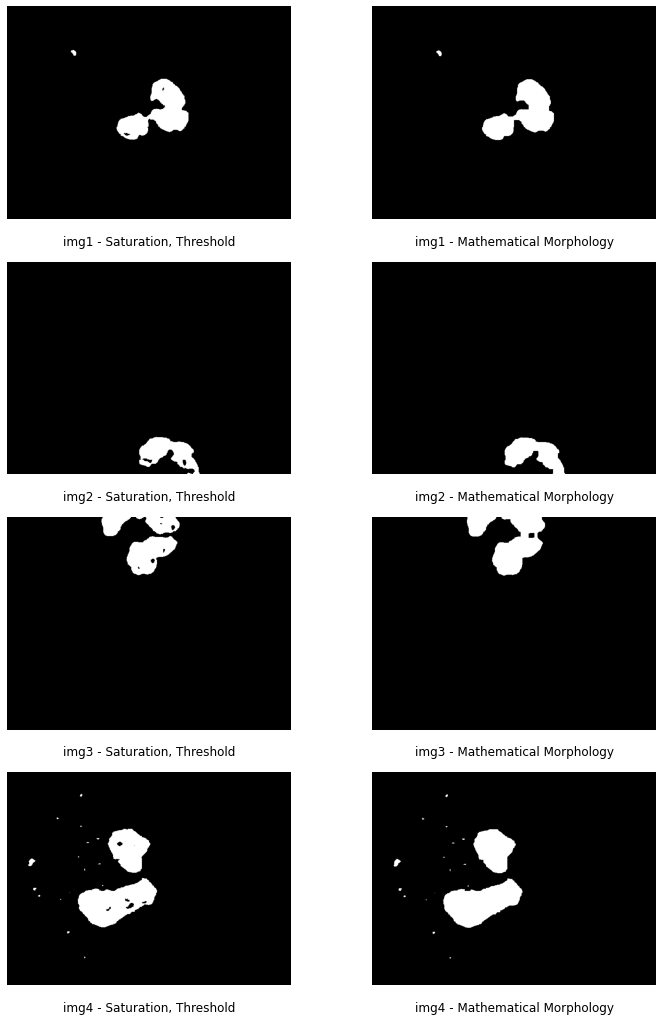

In [7]:
imgs_closing = [cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((10,10),np.uint8)) for img in imgs_thrs]

plt.figure(figsize=(12,18))
cont = 1
for i, img in enumerate(imgs_closing):    
    plt.subplot(4,2,cont)
    plt.axis('off')
    plt.title(names[i] + ' - ' + 'Saturation, Threshold', y=-0.15)
    plt.imshow(imgs_thrs[i], cmap = 'gray', vmin = 0, vmax = 255)
    
    plt.subplot(4,2,cont + 1)
    plt.axis('off')
    plt.title(names[i] + ' - ' + 'Mathematical Morphology', y=-0.15)
    plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
    cont += 2

## 7. Get the edges from the White blood cells

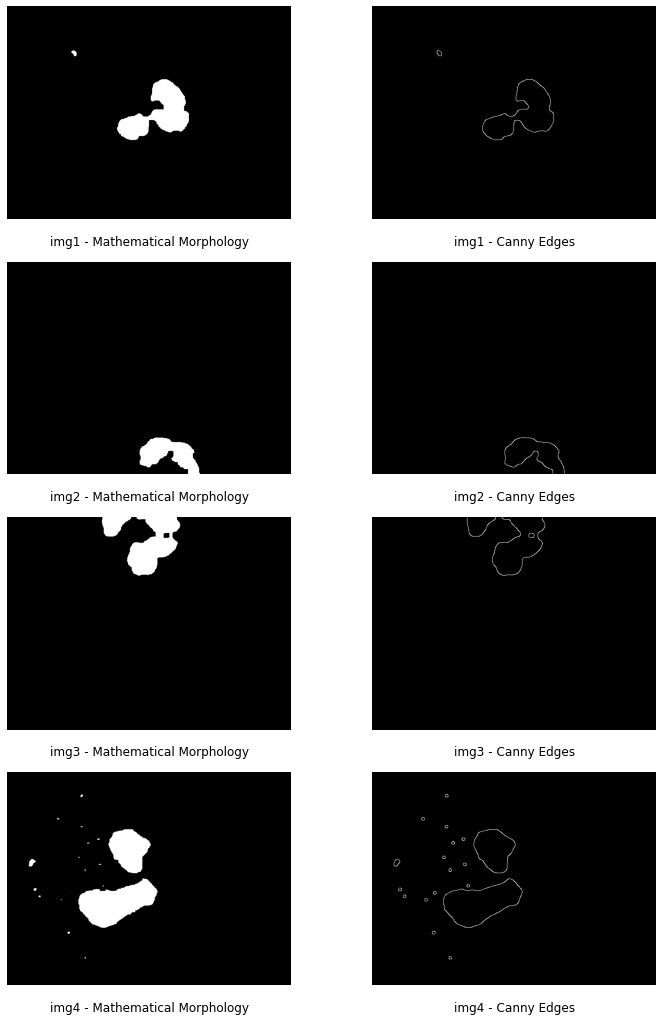

In [8]:
imgs_edges = [feature.canny(img, sigma=3) for img in imgs_closing]

plt.figure(figsize=(12,18))
cont = 1
for i, img in enumerate(imgs_edges):    
    plt.subplot(4,2,cont)
    plt.axis('off')
    plt.title(names[i] + ' - ' + 'Mathematical Morphology', y=-0.15)
    plt.imshow(imgs_closing[i], cmap = 'gray', vmin = 0, vmax = 255)
    
    plt.subplot(4,2,cont + 1)
    plt.axis('off')
    plt.title(names[i] + ' - ' + 'Canny Edges', y=-0.15)
    plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 1)
    cont += 2

## 8. Highlight the white Blood cells in the original images

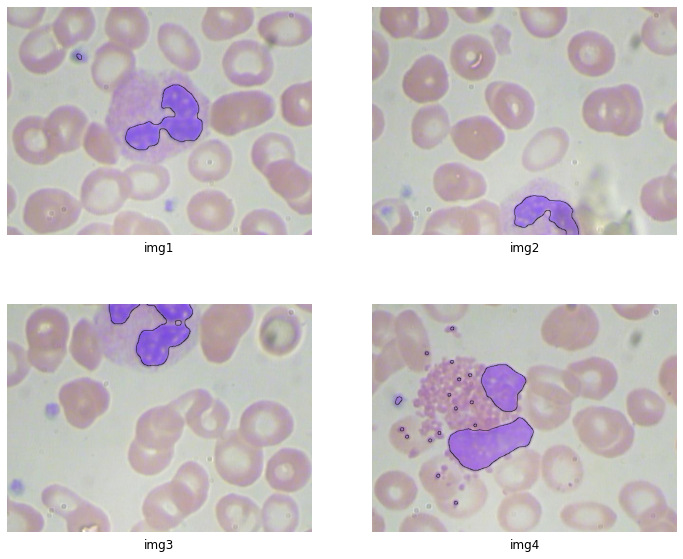

In [9]:
plt.figure(figsize=(12,10))
for i, img in enumerate(imgs):
    
    new_img = img.copy()
    new_img[imgs_edges[i]] = np.array([0,0,0])
    
    plt.subplot(2,2,i+1)
    plt.axis('off')
    plt.title(names[i], y=-0.10)
    plt.imshow(new_img)